In [1]:
%pylab inline
import sys
sys.path.append('..\..')
from genx import api
from genx.bumps_interface import NBMonitor

Populating the interactive namespace from numpy and matplotlib
'Plugin' object has no attribute 'data'


In [2]:
import warnings

from bumps.fitters import LevenbergMarquardtFit, DEFit, fit, FIT_ACTIVE_IDS
from bumps.dream.views import *

warnings.filterwarnings('ignore')

## Load a GenX project and run a fit with bumps

In [3]:
model,optimizer=api.load('D17_TOF_SiO.hgx')
model.compile_script()
print(FIT_ACTIVE_IDS)

['amoeba', 'de', 'dream', 'newton', 'lm', 'mp']


In [4]:
bproblem=model.bumps_problem() # only needed if NBMonitor is used
res=model.bumps_fit(method='dream',  pop=15, samples=1e5, burn=800, thin=1, alpha=0, outliers='none', 
                         trim=False, monitors=[NBMonitor(bproblem)], problem=bproblem)

# steps: 1667, # draws: 100020


              Parameter       mean  median    best [   68% interval] [   95% interval]
 1       SiliconOxide_D   1245(28) 1243.198 1243.216 [1243.04 1243.35] [1242.86 1243.51]
 2    SiliconOxide_Dens 0.03448(34) 0.0345117 0.0345115 [0.034499 0.034524] [0.034486 0.034536]
 3   SiliconOxide_Sigma   4.56(30)   4.551   4.545 [   4.42    4.68] [   4.28    4.81]
 4            Sub_Sigma   9.31(28)   9.316   9.329 [   9.04    9.59] [   8.77    9.84]

Statistics and plots based on 98589 samples (100.0% of total samples drawn)


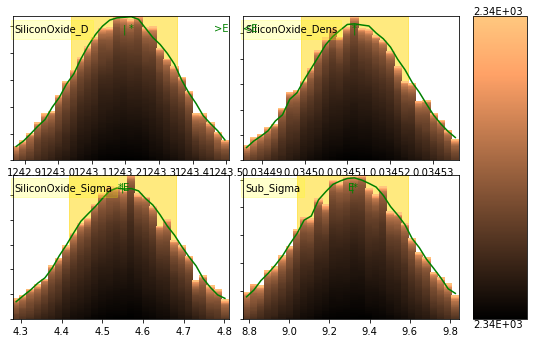

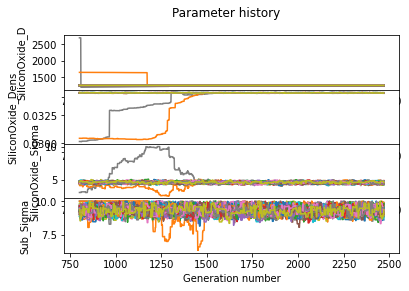

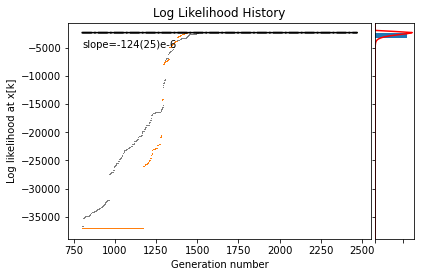

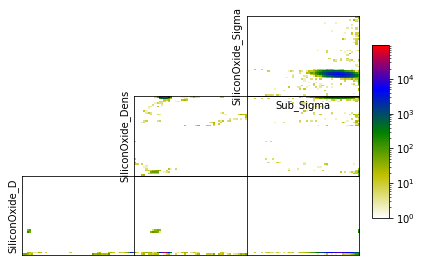

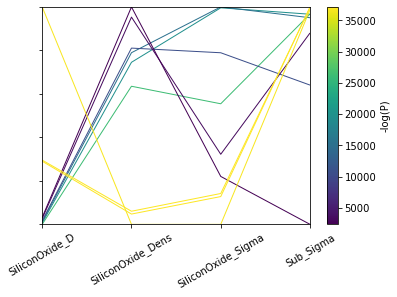

In [5]:
plot_all(res.state)

### Update the model with resulting parameters

Genx Model - compiled
File: C:\Users\Artur\genx\genx\genx\examples\D17_TOF_SiO.hgx
Parameters:
           Parameter        Value            Fit              Min              Max              Error           
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
                            0.0              False            0.0              0.0              None            
           SiliconOxide.setDens 0.03451150385418817 True             0.0170754        0.0683016        -               
                            0.0              False            0.0              0.0              None            
           SiliconOxide.setD 1243.2160760056297 True             675.0            2700.0           -               
                            0.0              False            0.0              0.0              None            
           SiliconOxide.setSigma 4.544788409363912 True             2.5              10.0             -               
                            0.0              False            0.0              0.0              None            
           Sub.setSigma     9.328798910460815 True             2.5              10.0             -               
DataList([
           DataSet(name=Name           , show=True, use=True, error=True),
           ])
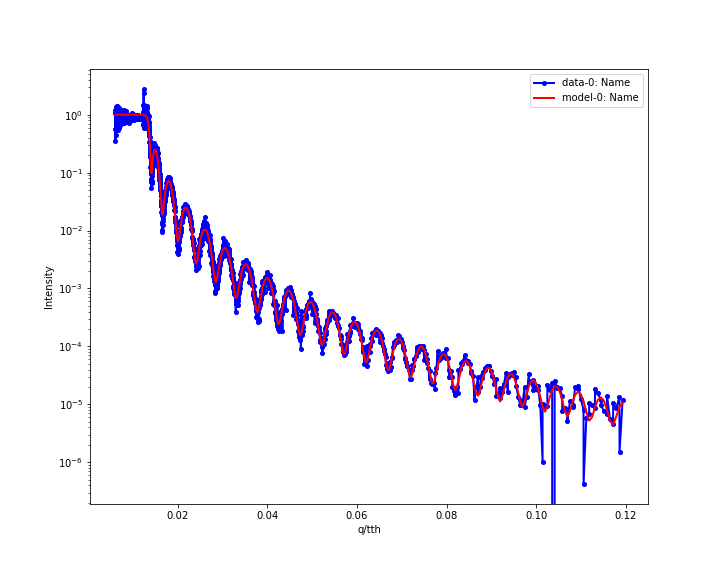

In [6]:
for pi in model.parameters:
    if pi.fit:
        pi.value=bproblem.model_parameters()[pi.name.replace('.set', '_')].value
model.simulate()
model